In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Load Dataset
data = pd.read_csv("Datasets/Social_Network_Ads.csv")
print("Dataset Loaded Successfully")
print(data.head())
# Check for nulls
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Loaded Successfully
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing Values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3148\2700060678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=data, palette='coolwarm')


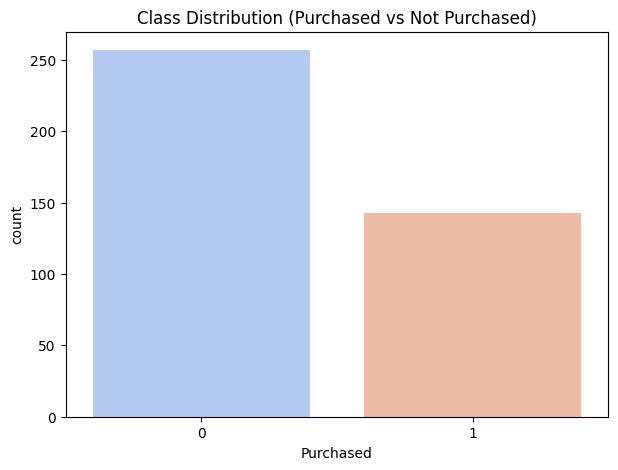

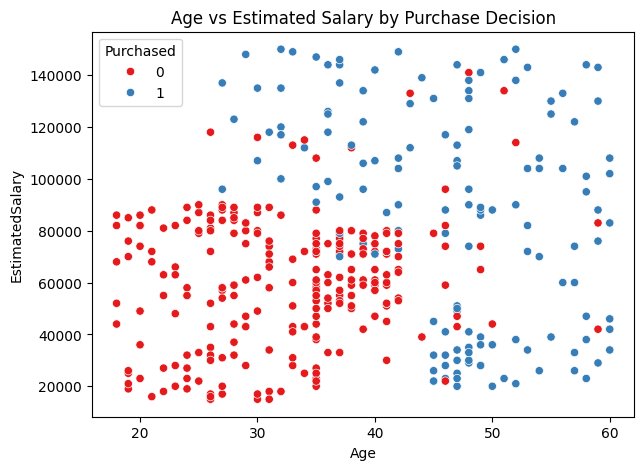

In [3]:
# Data Visualization
plt.figure(figsize=(7,5))
sns.countplot(x='Purchased', data=data, palette='coolwarm')
plt.title("Class Distribution (Purchased vs Not Purchased)")
plt.show()
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased',
data=data, palette='Set1')
plt.title("Age vs Estimated Salary by Purchase Decision")
plt.show()

In [4]:
# Feature Selection & Scaling
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("\nModel Training Complete")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Model Training Complete
Intercept: [-1.03148422]
Coefficients: [[1.92307917 1.07843614]]


In [7]:
# Model Prediction
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

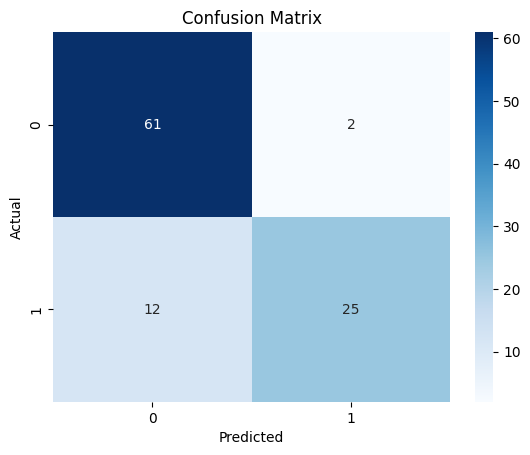


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [9]:
# Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

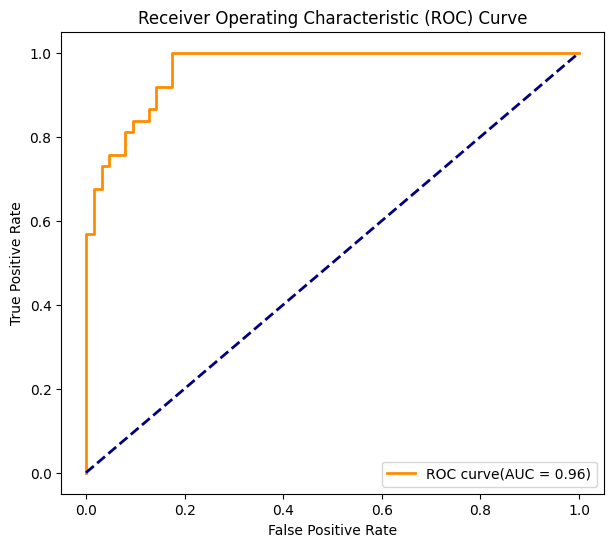

In [12]:
# ROC–AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

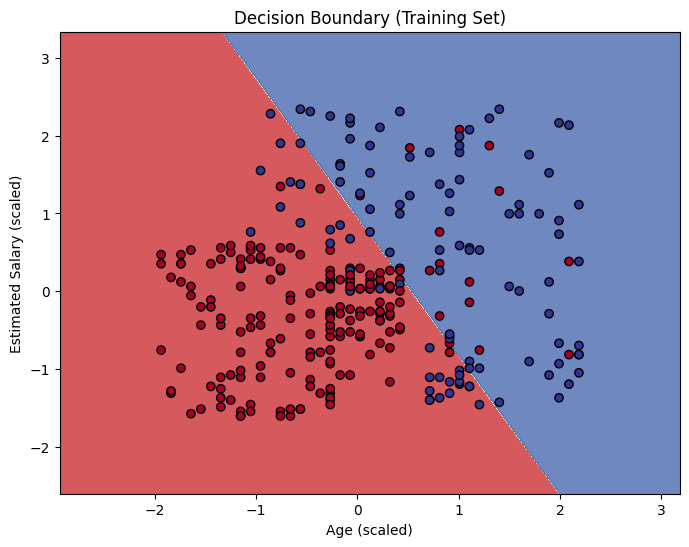

In [13]:
# Decision Boundary Visualization (optional but insightful)
# Visualize decision boundary
X_set, y_set = X_train_scaled, y_train
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min()-1, X_set[:, 0].max()+1, 0.01),
    np.arange(X_set[:, 1].min()-1, X_set[:, 1].max()+1, 0.01)
    )
plt.figure(figsize=(8,6))
plt.contourf(
X1, X2, model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=plt.cm.RdYlBu)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set,cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("Decision Boundary (Training Set)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()